<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/16_3_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functional API를 통해서 더 복잡한 구조의 모델을 만들 수 있다. 

https://www.tensorflow.org/guide/keras/functional


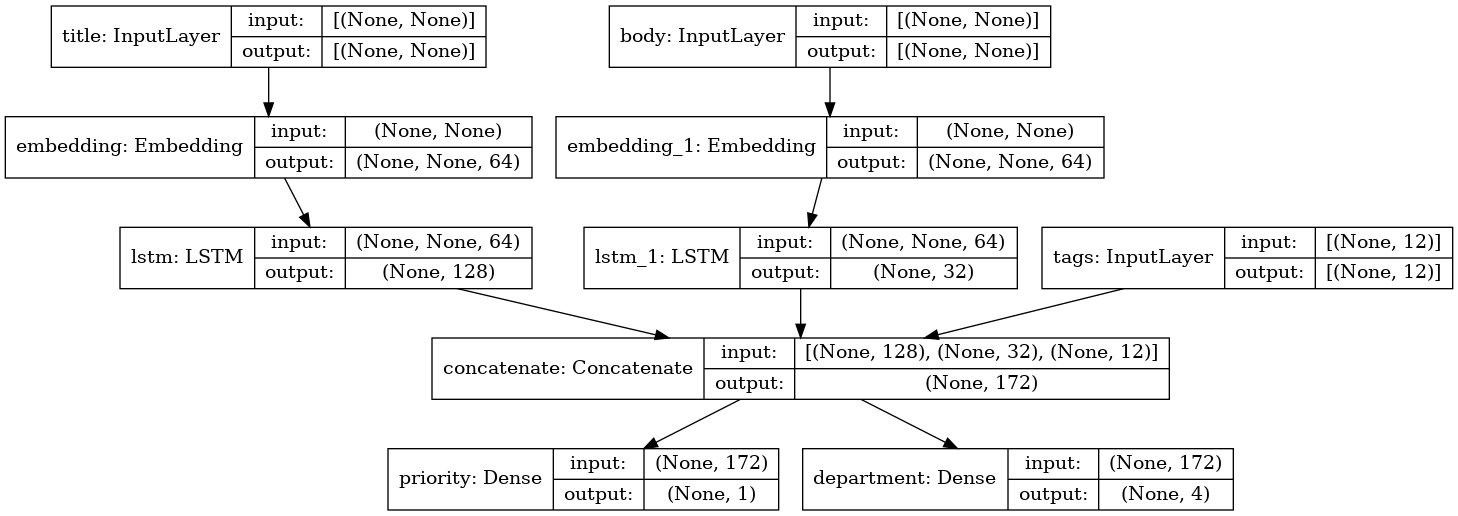

In [ ]:
import tensorflow as tf

# 데이터 불러오기
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 Scaling
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 간단한 모델 만들기

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# 모델 컴파일하기
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 모델 학습
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4881 - accuracy: 0.8578
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1503 - accuracy: 0.9550
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1113 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0872 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0775 - accuracy: 0.9752


Functional API로 모델을 바꿔봅시다

In [ ]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(input_shape=(28, 28)),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation='softmax')
# ])

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten
from tensorflow.keras import Model

In [ ]:
in_ = Input(shape=(28,28))
x = Flatten()(in_)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
out_ = Dense(10, activation = 'softmax')(x)
model2 = Model(inputs = in_, outputs=out_)

In [ ]:
# 모델 컴파일하기
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4873 - accuracy: 0.8589
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1489 - accuracy: 0.9552
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9664
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9779


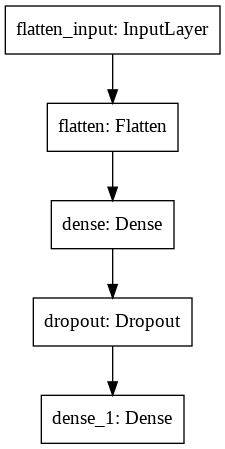

In [ ]:
tf.keras.utils.plot_model(model)

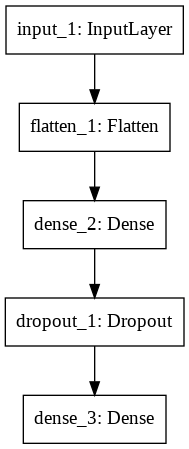

In [ ]:
tf.keras.utils.plot_model(model2)

Boston_housing Data를 사용해서 입력이 2개인 모델을 만들어봅시다

https://www.kaggle.com/c/boston-housing

In [ ]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
print(x_train.dtype, y_train.dtype)
print(x_train.shape, y_train.shape)
print(y_test.shape)

float64 float64
(404, 13) (404,)
(102,)


In [ ]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
import pandas as pd
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
x_train1, x_train2 = x_train[:, :10], x_train[:,10:]
x_test1, x_test2 = x_test[:, :10], x_test[:,10:]

In [ ]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model


In [ ]:
input_A = Input(shape=[10])
input_B = Input(shape=[3])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 16)           176         input_2[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 16)           272         dense_10[0][0]                   
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 3)]          0                                            
____________________________________________________________________________________________

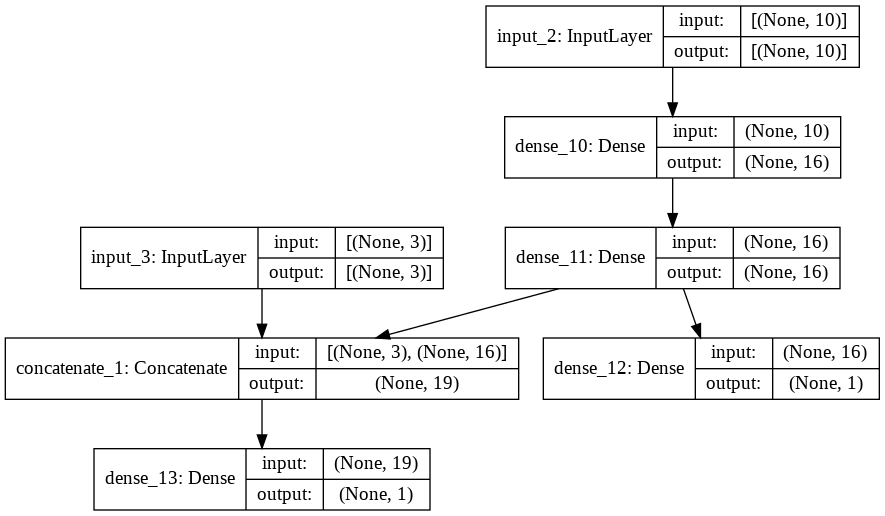

In [ ]:
h1 = Dense(16, activation='relu')(input_A)
h2 = Dense(16, activation='relu')(h1)
concat = concatenate([input_B, h2])
out1 = Dense(1)(h2)
out2 = Dense(1)(concat)
model = Model(inputs = [input_A, input_B], outputs = [out1, out2])
model.summary()
plot_model(model, show_shapes=True)


In [ ]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.2, 0.8], optimizer='RMSprop')
history = model.fit([x_train1, x_train2], [y_train, y_train], epochs=10, validation_data=([x_test1, x_test2], [y_test, y_test]))

Epoch 1/10
13/13 [==============================] - 1s 27ms/step - loss: 8357.5389 - dense_12_loss: 1795.4088 - dense_13_loss: 9998.0716 - val_loss: 5226.4634 - val_dense_12_loss: 1087.2858 - val_dense_13_loss: 6261.2573
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 4680.3146 - dense_12_loss: 858.6040 - dense_13_loss: 5635.7420 - val_loss: 3099.8987 - val_dense_12_loss: 507.5466 - val_dense_13_loss: 3747.9866
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 2986.4256 - dense_12_loss: 374.5231 - dense_13_loss: 3639.4009 - val_loss: 1894.7338 - val_dense_12_loss: 316.0491 - val_dense_13_loss: 2289.4050
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 2138.1616 - dense_12_loss: 300.0799 - dense_13_loss: 2597.6818 - val_loss: 1279.8295 - val_dense_12_loss: 290.3065 - val_dense_13_loss: 1527.2102
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 1548.3810 - dense_12_loss: 283.1319 - dense_13_loss: 